In [1]:
#import the packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

from collections import Counter

In [2]:
#read the cleaned and encoded file for futher processing
product_df = pd.read_excel("Product_Sales_Cleaned.xlsx")
product_df.head()

SKU  Sales  Season  Promo_On  Week
0    0   6988       3         0     4
1    0   6743       3         0     5
2    0   4112       3         0     6
3    0   5732       3         0     7
4    0   5559       1         0     9

In [3]:
product_df.describe()

SKU         Sales      Season    Promo_On        Week
count  119.000000    119.000000  119.000000  119.000000  119.000000
mean     0.974790   6153.411765    1.336134    0.336134   29.487395
std      0.858282   6332.441985    1.075752    0.474383   14.072371
min      0.000000   -163.000000    0.000000    0.000000    4.000000
25%      0.000000    461.500000    0.000000    0.000000   18.500000
50%      1.000000   5363.000000    1.000000    0.000000   30.000000
75%      2.000000  10469.000000    2.000000    1.000000   41.500000
max      2.000000  52524.000000    3.000000    1.000000   52.000000

### Data Visualization

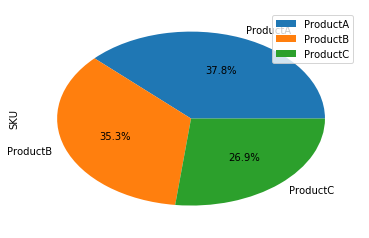

In [4]:
product_df['SKU'].value_counts(sort=True).plot.pie(labels=['ProductA','ProductB','ProductC'],
                                                  legend = True,autopct ='%1.1f%%',shadow=False)
plt.show()                                                  
                                                  

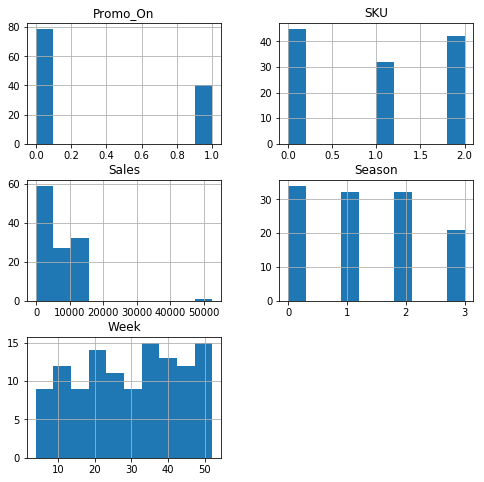

In [5]:
product_df.hist(figsize=(8,8))
plt.show()

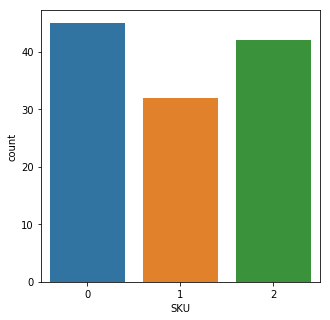

In [6]:
plt.figure(figsize=(5,5))
sb.countplot(product_df.SKU, data=product_df)
plt.show()

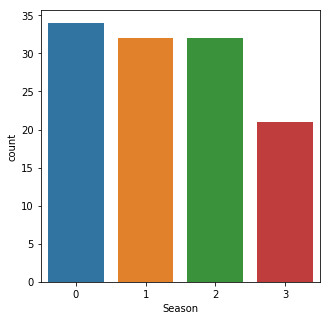

In [7]:
plt.figure(figsize=(5,5))
sb.countplot(product_df.Season, data=product_df)
plt.show()

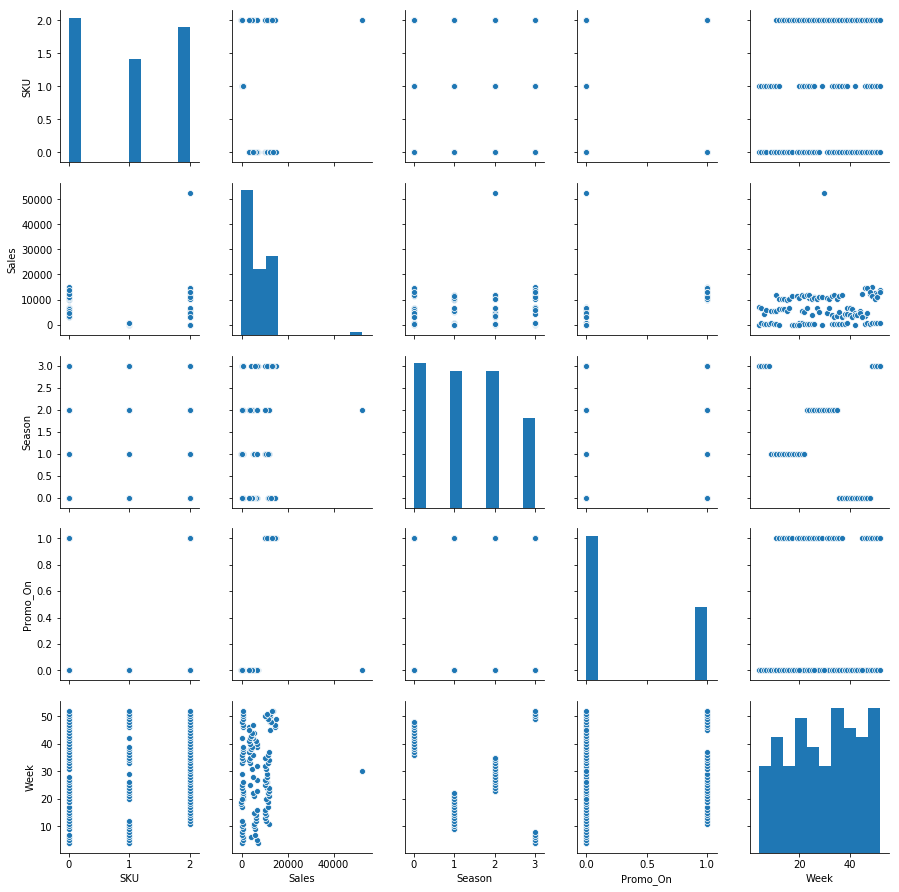

In [8]:
sb.pairplot(product_df)

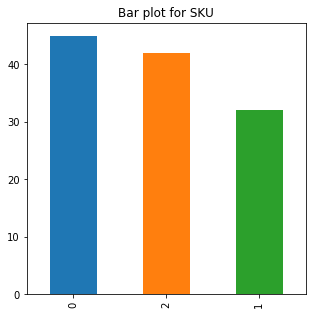

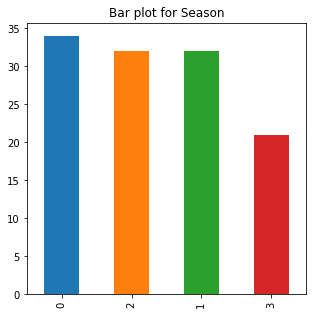

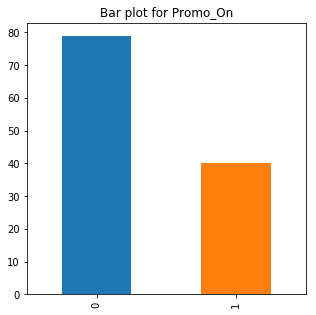

In [9]:
cols = product_df[['SKU','Season','Promo_On']]
for col in cols:
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    
    counts = product_df[col].value_counts()
    counts.plot.bar(ax=ax)
    ax.set_title('Bar plot for ' + col)


### Feature Engineering - Check for Data Correlation

In [10]:
product_df.corr(method='spearman').round(2)

SKU  Sales  Season  Promo_On  Week
SKU       1.00   0.01   -0.04      0.14  0.08
Sales     0.01   1.00    0.08      0.80  0.18
Season   -0.04   0.08    1.00      0.16 -0.21
Promo_On  0.14   0.80    0.16      1.00  0.14
Week      0.08   0.18   -0.21      0.14  1.00

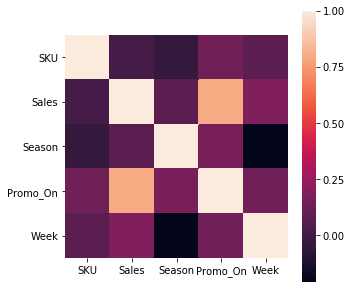

In [11]:
#read the correlation information to check for attributes that has high correlation with the Sales, 
#we notice the Promo flag has high correlation followed by week and season
correlation_matrix = product_df.corr(method='spearman').round(2)
f, ax = plt.subplots(figsize=(5,5))
sb.heatmap(correlation_matrix,square=True)